<a href="https://colab.research.google.com/github/GoldFiiish/semester2nd/blob/master/VGG16TrasferforSemiconductorWafers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

base_model=VGG16(weights='imagenet',include_top=False) 
#imports the mobilenet model and discards the last 1000 neuron layer.

base_model.summary()


x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(9,activation='softmax')(x) 



model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True


from google.colab import drive

drive.mount('/content/gdrive')



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [17]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
display(train_datagen)
train_generator=train_datagen.flow_from_directory('gdrive/My Drive/semidb', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=2,
                                                 class_mode='categorical',
                                                 shuffle=True)



model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=25)







Found 2171 images belonging to 9 classes.
Epoch 1/25
1085/1085 [==============================] - 768s 708ms/step - loss: 1.1584 - accuracy: 0.5680
Epoch 2/25
1085/1085 [==============================] - 18s 17ms/step - loss: 0.7489 - accuracy: 0.7331
Epoch 3/25
1085/1085 [==============================] - 19s 17ms/step - loss: 0.6728 - accuracy: 0.7483
Epoch 4/25
1085/1085 [==============================] - 18s 17ms/step - loss: 0.5950 - accuracy: 0.7782
Epoch 5/25
1085/1085 [==============================] - 18s 17ms/step - loss: 0.5483 - accuracy: 0.8018
Epoch 6/25
1085/1085 [==============================] - 19s 17ms/step - loss: 0.5217 - accuracy: 0.8059
Epoch 7/25
1085/1085 [==============================] - 19s 17ms/step - loss: 0.4822 - accuracy: 0.8243
Epoch 8/25
1085/1085 [==============================] - 19s 17ms/step - loss: 0.4627 - accuracy: 0.8266
Epoch 9/25
1085/1085 [==============================] - 19s 17ms/step - loss: 0.4394 - accuracy: 0.8313
Epoch 10/25
1085/108

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=213x217 at 0x7FC79656A400>
(217, 213, 4)
(217, 213, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

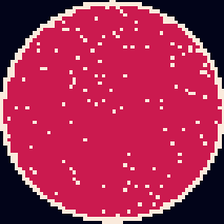

[1]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=213x217 at 0x7FC796477AC8>
(217, 213, 4)
(217, 213, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

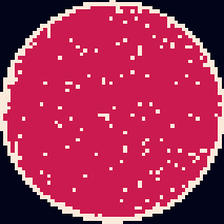

[1]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=213x217 at 0x7FC79E065550>
(217, 213, 4)
(217, 213, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

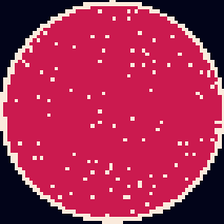

[1]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=213x217 at 0x7FC79649FEF0>
(217, 213, 4)
(217, 213, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

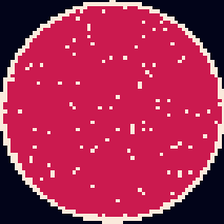

[1]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=285x217 at 0x7FC796400CF8>
(217, 285, 4)
(217, 285, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

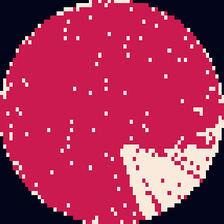

[2]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=207x217 at 0x7FC7965021D0>
(217, 207, 4)
(217, 207, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

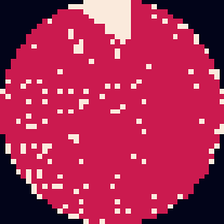

[2]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=200x217 at 0x7FC7965A57B8>
(217, 200, 4)
(217, 200, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

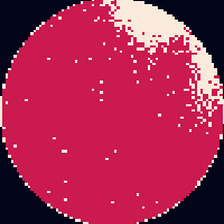

[2]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=172x217 at 0x7FC796400128>
(217, 172, 4)
(217, 172, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

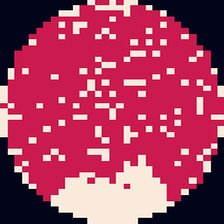

[2]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=302x217 at 0x7FC79E142E10>
(217, 302, 4)
(217, 302, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

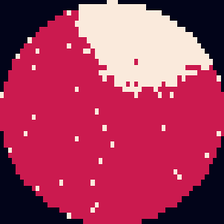

[2]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=186x217 at 0x7FC796526668>
(217, 186, 4)
(217, 186, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

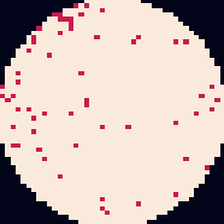

[3]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=186x217 at 0x7FC79649B2B0>
(217, 186, 4)
(217, 186, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

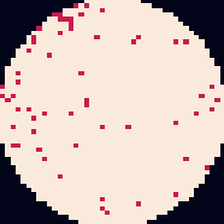

[3]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=222x217 at 0x7FC79F4E5B00>
(217, 222, 4)
(217, 222, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

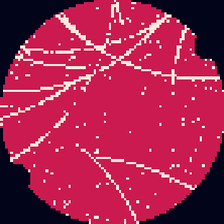

[4]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=185x217 at 0x7FC79E044588>
(217, 185, 4)
(217, 185, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

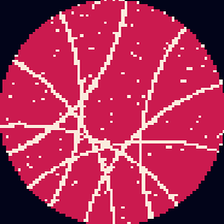

[4]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=221x217 at 0x7FC79649F978>
(217, 221, 4)
(217, 221, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

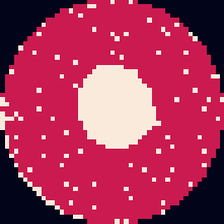

[4]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=221x217 at 0x7FC79E0E8CF8>
(217, 221, 4)
(217, 221, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

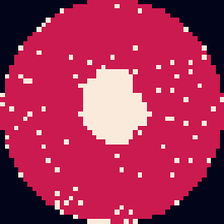

[4]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=315x217 at 0x7FC7964584A8>
(217, 315, 4)
(217, 315, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

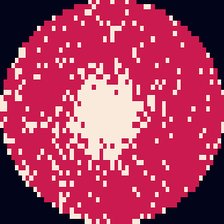

[2]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=246x217 at 0x7FC7964F2518>
(217, 246, 4)
(217, 246, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

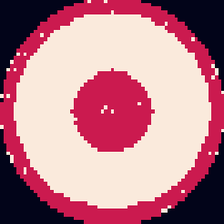

[5]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=246x217 at 0x7FC79F55F048>
(217, 246, 4)
(217, 246, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

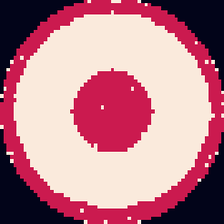

[5]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=246x217 at 0x7FC796400128>
(217, 246, 4)
(217, 246, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

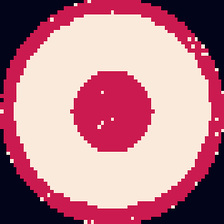

[5]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=185x217 at 0x7FC796412470>
(217, 185, 4)
(217, 185, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

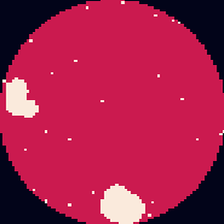

[2]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=217x217 at 0x7FC7964C7CC0>
(217, 217, 4)
(217, 217, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

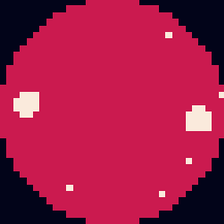

[6]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=217x217 at 0x7FC7964770F0>
(217, 217, 4)
(217, 217, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

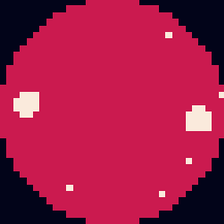

[6]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=172x217 at 0x7FC79E09C748>
(217, 172, 4)
(217, 172, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

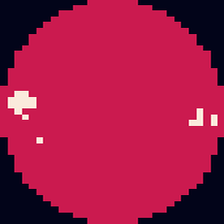

[6]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=172x217 at 0x7FC79649F940>
(217, 172, 4)
(217, 172, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

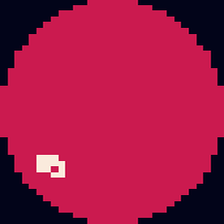

[6]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=231x217 at 0x7FC7963B1550>
(217, 231, 4)
(217, 231, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

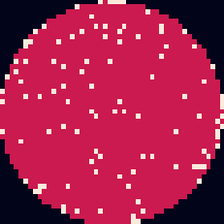

[7]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=231x217 at 0x7FC796526DD8>
(217, 231, 4)
(217, 231, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

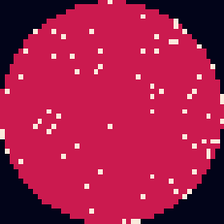

[7]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=217x217 at 0x7FC796452E10>
(217, 217, 4)
(217, 217, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

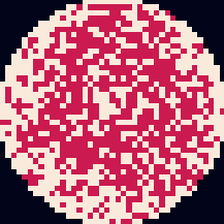

[8]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=217x217 at 0x7FC7964D7C50>
(217, 217, 4)
(217, 217, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

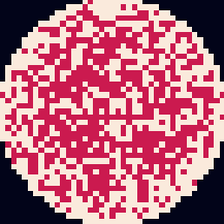

[8]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=217x217 at 0x7FC79E05ECC0>
(217, 217, 4)
(217, 217, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

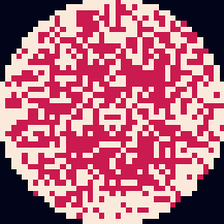

[8]
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=217x217 at 0x7FC7963BD390>
(217, 217, 4)
(217, 217, 4)
(224, 224, 4)
224
(224, 224, 3)
(1, 224, 224, 3)


'___________________________________________________________________________________________'

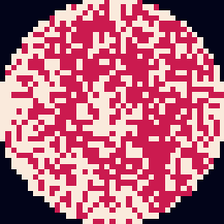

[8]


In [31]:
from numpy import zeros, newaxis

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [

    "https://i.ibb.co/9yT9vDx/books-read12671.png",   #ring1
    "https://i.ibb.co/dpVqMLs/books-read12645.png",   #ring1
    "https://i.ibb.co/frGq08T/books-read12625.png",   #ring1
    "https://i.ibb.co/NYbQcTj/books-read12682.png",   #ring1
    "https://i.ibb.co/XYPKZkQ/books-read371142.png",  #edgeLoc2
    "https://i.ibb.co/tLNqL2N/books-read298205.png",  #edgeLoc2
    "https://i.ibb.co/0nHmzbK/books-read234278.png",  #edgeLoc2
    "https://i.ibb.co/b2X147s/books-read88610.png",  #edgeLoc2
    "https://i.ibb.co/C15BzBJ/books-read7371.png",  #edgeLoc2
    "https://i.ibb.co/qmD3rPd/books-read247177.png",  #nearfull3
    "https://i.ibb.co/qmD3rPd/books-read247177.png",  #nearfull3
    "https://i.ibb.co/df3G9kX/books-read23516.png",  #scratch4!
    "https://i.ibb.co/NYsT7tY/books-read52768.png",  #scratch4!
    "https://i.ibb.co/hsMWsVp/books-read97136.png",   #cent4!   
    "https://i.ibb.co/gD6Z0GG/books-read97133.png",   #cent4!
    "https://i.ibb.co/zS8pYMW/books-read96012.png",   #cent4!
    "https://i.ibb.co/hKtRj70/books-read116271.png",  #donoout5
    "https://i.ibb.co/HH8MQKH/books-read116269.png",  #donoout5
    "https://i.ibb.co/ZK3tj1H/books-read116264.png",  #donoout5
    "https://i.ibb.co/GCMjdsc/books-read48324.png", #loc6
    "https://i.ibb.co/cN1F0BY/books-read49514.png", #loc6
    "https://i.ibb.co/cN1F0BY/books-read49514.png", #loc6
    "https://i.ibb.co/X4h2MVX/books-read88963.png", #loc6
    "https://i.ibb.co/fpzznWv/books-read90639.png", #loc6
    "https://i.ibb.co/h2ztg2K/books-read3.png",     #none7
    "https://i.ibb.co/3FJf46q/books-read4.png",     #none7
    "https://i.ibb.co/02bjJFk/books-read19189.png", #random8
    "https://i.ibb.co/cQkj4W5/books-read19185.png", #random8
    "https://i.ibb.co/6NSpF6W/books-read19184.png", #random8
    "https://i.ibb.co/6vXPXfq/books-read19188.png"  #random8
    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    #img = np.expand_dims(img, axis=3)
    print(img)
    print(np.shape(img))
    #img[:, :, newaxis]
    print(np.shape(img))

    #plt.imshow(img, cmd='rgb')
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    #x[:, :, newaxis]
    print(x.shape)

    wi, he , ch= x.shape
    print(wi)

    xx = np.empty((wi, he, 3), dtype=np.uint8)
    xx[:, :, 0] = x[:, : ,0]
    xx[:, :, 1] = x[:, : ,0]
    xx[:, :, 2] = x[:, : ,0]
    print(np.shape(xx))

    xx = np.expand_dims(xx, axis=0)
    print(np.shape(xx))

    xx = preprocess_input(xx)
    pred = model.predict(xx)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))